# Predicting Car Price using MLR

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
data=pd.read_csv("C:\\Users\\aakas\\OneDrive\\Desktop\\CarPrice.csv")

In [55]:
data

,car_ID,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,horsepower,price,engine,engine cc,mileage,mileage kmpl
0,1,alfa-romero giulia,convertible,rwd,88.6,168.8,64.1,48.8,111.0,13495.0,1248 CC,1248.0,23.4 kmpl,23.40
1,2,alfa-romero stelvio,convertible,rwd,88.6,168.8,64.1,48.8,111.0,16500.0,1249 CC,1249.0,21.14 kmpl,21.14
2,3,alfa-romero Quadrifoglio,hatchback,rwd,94.5,171.2,65.5,52.4,154.0,16500.0,1250 CC,1250.0,17.7 kmpl,17.70
3,4,audi 100 ls,sedan,fwd,99.8,176.6,66.2,54.3,102.0,13950.0,1251 CC,1251.0,23.0 kmpl,23.00
4,5,audi 100ls,sedan,4wd,99.4,176.6,66.4,54.3,115.0,17450.0,1252 CC,1252.0,16.1 kmpl,16.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,201,volvo 145e (sw),sedan,rwd,109.1,188.8,68.9,55.5,114.0,16845.0,NaN,NaN,NaN,NaN
200,202,volvo 144ea,sedan,rwd,109.1,188.8,68.8,55.5,160.0,19045.0,1497 CC,1497.0,17.4 kmpl,17.40
201,203,volvo 244dl,sedan,rwd,109.1,188.8,68.9,55.5,134.0,21485.0,1198 CC,1198.0,19.4 kmpl,19.40
202,204,volvo 246,sedan,rwd,109.1,188.8,68.9,55.5,106.0,22470.0,998 CC,998.0,26.6 km/kg,26.60


In [56]:
y_org=data.price
y_org

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
199    16845.0
200    19045.0
201    21485.0
202    22470.0
203    22625.0
Name: price, Length: 204, dtype: float64

In [57]:

data['carlength'].fillna(data['carlength'].mean(),inplace=True)
data['carwidth'].fillna(data['carwidth'].mean(),inplace=True)
data['carheight'].fillna(data['carheight'].mean(),inplace=True)
data['mileage kmpl'].fillna(data['mileage kmpl'].mean(),inplace=True)
data['price'].fillna(data['price'].mean(),inplace=True)
data['engine cc'].fillna(data['engine cc'].mean(),inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_ID        204 non-null    int64  
 1   CarName       204 non-null    object 
 2   carbody       204 non-null    object 
 3   drivewheel    204 non-null    object 
 4   wheelbase     199 non-null    float64
 5   carlength     204 non-null    float64
 6   carwidth      204 non-null    float64
 7   carheight     204 non-null    float64
 8   horsepower    202 non-null    float64
 9   price         204 non-null    float64
 10  engine        197 non-null    object 
 11  engine cc     204 non-null    float64
 12  mileage       197 non-null    object 
 13  mileage kmpl  204 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 22.4+ KB


In [59]:
data['carlength'] = data['carlength'].apply(round).astype(int)
data['carwidth'] = data['carwidth'].apply(round).astype(int)
data['carheight'] = data['carheight'].apply(round).astype(int)
data['engine cc'] = data['engine cc'].apply(round).astype(int)
data['mileage kmpl'] = data['mileage kmpl'].apply(round).astype(int)
data['price'] = data['price'].apply(round).astype(int)

In [61]:
x=['carlength','carwidth','carheight','engine cc','mileage kmpl']
y=['price']
X=data[x]
Y=data[y]

In [62]:
X

,carlength,carwidth,carheight,engine cc,mileage kmpl
0,169,64,49,1248,23
1,169,64,49,1249,21
2,171,66,52,1250,18
3,177,66,54,1251,23
4,177,66,54,1252,16
...,...,...,...,...,...
199,189,69,56,1457,19
200,189,69,56,1497,17
201,189,69,56,1198,19
202,189,69,56,998,27


In [63]:
Y

,price
0,13495
1,16500
2,16500
3,13950
4,17450
...,...
199,16845
200,19045
201,21485
202,22470


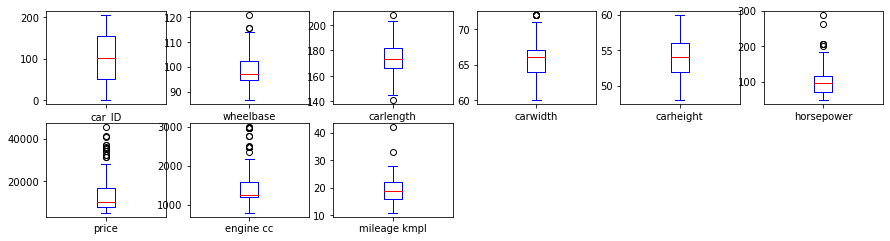

In [64]:
boxplot=data.plot(kind='box', subplots=True, layout=(5,6), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))

<AxesSubplot:>

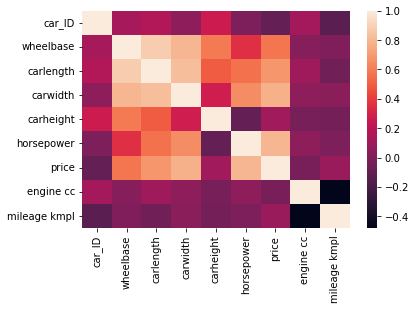

In [65]:
sns.heatmap(data.corr())

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

In [67]:
X_train

,carlength,carwidth,carheight,engine cc,mileage kmpl
164,169,64,53,1995,23
51,159,64,54,2477,14
185,172,66,56,796,18
190,180,67,55,993,17
92,165,64,54,1086,20
...,...,...,...,...,...
67,191,70,56,1498,22
192,183,67,55,1599,16
117,187,68,56,1197,21
47,200,70,53,2982,13


In [68]:
y_train

,price
164,9298
51,6095
185,8495
190,13295
92,6849
...,...
67,25552
192,12290
117,18150
47,32250


In [69]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [70]:
X_test

,carlength,carwidth,carheight,engine cc,mileage kmpl
18,141,60,53,796,20
45,156,64,52,1248,24
33,150,64,53,1197,19
37,168,65,53,1591,17
109,199,68,59,1172,16
...,...,...,...,...,...
83,173,66,54,998,23
19,156,64,52,1396,23
154,170,64,59,1598,14
107,187,68,57,1591,17


In [71]:
y_pred=regressor.predict(X_test)
y_pred

array([[-5520.63853172],
       [ 7326.63752504],
       [ 5317.2430654 ],
       [10562.7561257 ],
       [19327.33243009],
       [ 7807.02336896],
       [15043.94508258],
       [16890.68915439],
       [11855.02258217],
       [ 3865.64731231],
       [14536.37676434],
       [11875.3077023 ],
       [14842.89876928],
       [ 8640.52555838],
       [ 7348.7981403 ],
       [27571.84277736],
       [31524.69966464],
       [18883.35822602],
       [16681.12900549],
       [14034.17744382],
       [ 7108.42535296],
       [12364.72957177],
       [12925.23987606],
       [12826.90379858],
       [13101.66298829],
       [12026.65618825],
       [ 4875.43280342],
       [11920.24291192],
       [ 8328.97921389],
       [ 7625.62225399],
       [22313.91954809],
       [11256.52320319],
       [22435.65396359],
       [32209.40900023],
       [13441.35836837],
       [ 8380.30707086],
       [32157.45302382],
       [ 8232.98976621],
       [14129.87312919],
       [ 7031.92413573],


In [73]:
print(regressor.intercept_)
print(regressor.coef_)

[-136274.07260747]
[[ 1.82729325e+02  2.39973705e+03 -7.38839807e+02 -9.01738345e-01
   4.40334713e+01]]


In [1]:
print('price = 1.82729325e+02*carlength + 2.39973705e+03*carwidth - 7.38839807e+02*carheight - 9.01738345e-01*engine cc + 4.40334713e+01*mileage kmpl  -  136274.07260747')

price = 1.82729325e+02*carlength + 2.39973705e+03*carwidth - 7.38839807e+02*carheight - 9.01738345e-01*engine cc + 4.40334713e+01*mileage kmpl  -  136274.07260747


In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(136, 5)
(136, 1)
(68, 5)
(68, 1)


In [75]:
print ('R-Squared for training dataset model:', regressor.score(X_train,y_train))

R-Squared for training dataset model: 0.6405544251416428


In [76]:
pred_df=pd.DataFrame(y_test-y_pred)
pred_df

,price
18,10671.638532
45,1589.362475
33,1211.756935
37,-2667.756126
109,-6887.332430
...,...
83,932.768334
19,-854.146779
154,4820.973700
107,-6378.465244


In [77]:
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3412.9875154371534
MSE: 22662435.578287512
RMSE: 4760.5079117975965


In [78]:
print(metrics.r2_score(y_test,y_pred))

0.6434111088048935


In [79]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 64.34


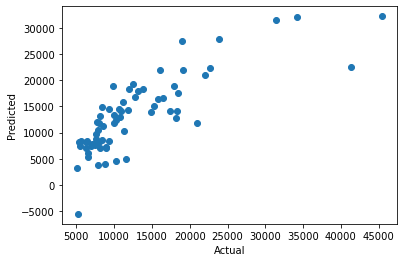

In [80]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

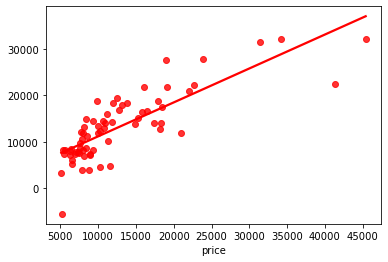

In [81]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

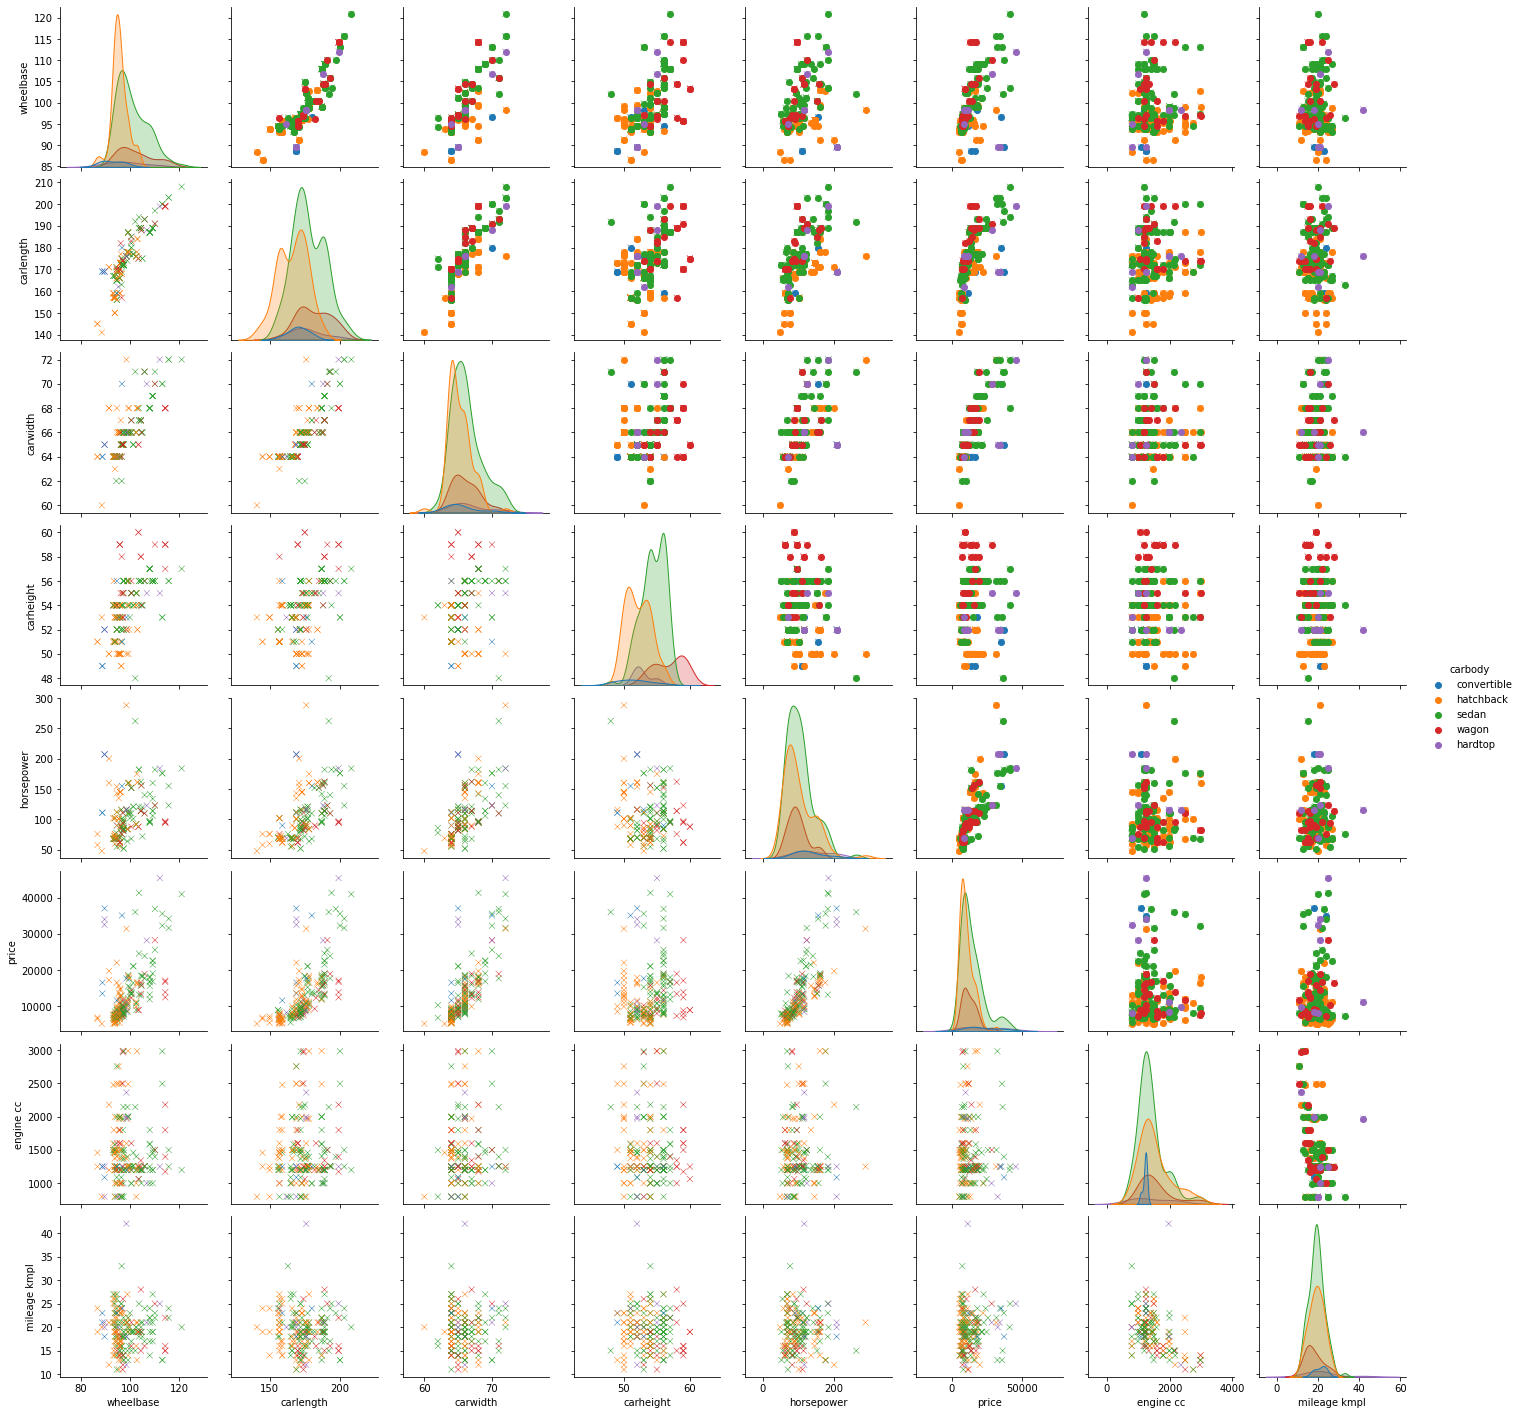

In [82]:
snsdata = data.drop(['car_ID'], axis=1)
g = sns.pairplot(snsdata, hue='carbody', markers='x')
g = g.map_upper(plt.scatter)